# LOAN DATA EXPLORATION

### by Pengfei Huangfu

## Preliminary Wrangling
> This document explores a dataset containing Borrower APR and attributes for approximately 113937 Loans.

In [138]:
# load all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [139]:
# load in the dataset into a pandas dataframe, print statistics
loan=pd.read_csv('prosperLoanData.csv')

In [140]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [141]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [142]:
# see number of dulipcated data entries
sum(loan.duplicated())

0

In [143]:
#Take only the interesting columns
loan = loan.loc[:,('Term','LoanStatus',
                          'BorrowerAPR',
                          'LenderYield',
                          'ProsperScore',
                          'BorrowerState',
                          'Occupation',
                          'EmploymentStatus',
                          'IncomeRange',
                          'StatedMonthlyIncome',
                          'LoanOriginalAmount',
                          'MonthlyLoanPayment') ]

In [144]:
# descriptive statistics for numberic variables
print(loan.describe())

                Term    BorrowerAPR    LenderYield  ProsperScore  \
count  113937.000000  113912.000000  113937.000000  84853.000000   
mean       40.830248       0.218828       0.182701      5.950067   
std        10.436212       0.080364       0.074516      2.376501   
min        12.000000       0.006530      -0.010000      1.000000   
25%        36.000000       0.156290       0.124200      4.000000   
50%        36.000000       0.209760       0.173000      6.000000   
75%        36.000000       0.283810       0.240000      8.000000   
max        60.000000       0.512290       0.492500     11.000000   

       StatedMonthlyIncome  LoanOriginalAmount  MonthlyLoanPayment  
count         1.139370e+05        113937.00000       113937.000000  
mean          5.608026e+03          8337.01385          272.475783  
std           7.478497e+03          6245.80058          192.697812  
min           0.000000e+00          1000.00000            0.000000  
25%           3.200333e+03          4000.0

### What is the structure of your dataset?

>the dataset contains 113,937 loans with 81 variables.

### What is/are the main features of interest in your data set?

>There are so many variables in this dataset. it is hard to find the main features of interest by just looking at the dataset. After some analysis I found that some features are more interesting than others. Through out the project I will work with Borrower APR, Prosper Score, Credit Score, Original Loan Amount, Borrower Occupation, Borrower State, Borrower Employment Status and some other feature if it seems interest later on.

### What features in the dataset do you think will help support your investigation into your features of interest?
>i will look into how Borrower APR changes over time and what are the features that can help us determine borrower APR. for that, i think features such as prosper score, stated monthly income and borrower employment status should have a strong effect on borrower APR.

## Univariate Exploration

### BorrowerAPR

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR.

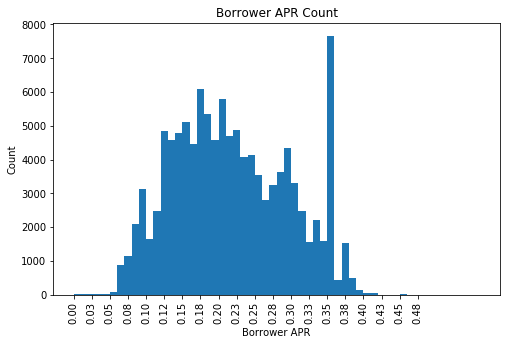

In [145]:
# start with a standard-scaled plot
bins = np.arange(0,loan['BorrowerAPR'].max()+0.05,0.01)

ticks =list(np.arange(0, 0.5, 0.025))

labels = ['{:.2f}'.format(v) for v in ticks]

plt.figure(figsize = [8,5])

plt.xticks(ticks, labels);

plt.xticks(rotation = 90); 

plt.hist(data = loan, x = 'BorrowerAPR',bins = bins);

plt.xlabel('Borrower APR')

plt.ylabel('Count')

plt.title('Borrower APR Count');

one interesting observation is: there is a concentration at 0.35 which means ton of penple borrow at 0.35

### Occupation

next, let us see how occupation distributes

In [146]:
loan['Occupation'].nunique()

67

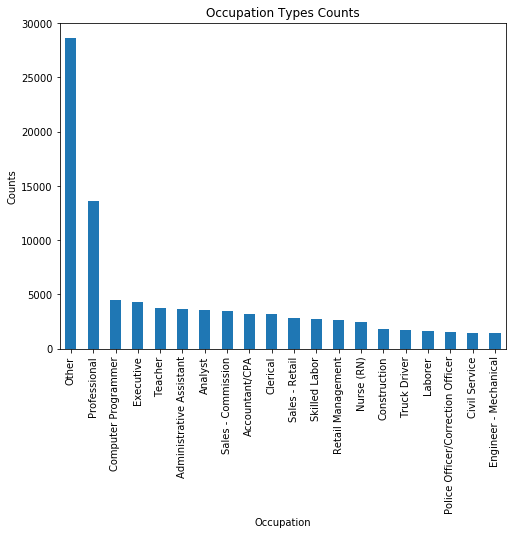

In [147]:
base_color = sns.color_palette()[0]

plt.figure(figsize = [8,6])

loan.Occupation.value_counts().head(20).plot(kind = 'bar', color = base_color);

plt.xlabel('Occupation')

plt.ylabel('Counts');

plt.title('Occupation Types Counts');


>we can find that **other** is the highest category that borrow money from prosper.



### Employment Status

In [148]:
# create new dataframe for employee status

employment = loan['EmploymentStatus']

In [149]:
employment.isna().sum()

2255

In [150]:
# drop na value
employment.dropna(inplace = True)

In [151]:
employment_count = employment.value_counts()

In [152]:
n_employment = employment.shape[0]

max_employ_count = employment.value_counts()[0]

max_prop = max_employ_count/n_employment
print(max_prop)


0.6028008094410917


In [153]:
np.arange(0, max_prop, 0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 ])

In [154]:
tick_prop = np.arange(0,max_prop,0.05)
tick_name = ['{:0.2f}'.format(v) for v in tick_prop]

In [155]:
type_order = employment_count.index

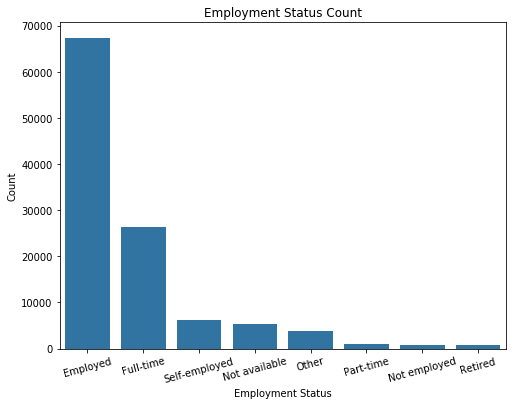

In [156]:
plt.figure(figsize = [8,6])

sns.countplot(data = loan, x = 'EmploymentStatus', color = base_color, order=type_order);

plt.xticks(rotation = 15);

plt.xlabel('Employment Status')

plt.ylabel('Count');

plt.title('Employment Status Count');

>the top 2 groups of people who get loans from prosper are Employeed or full-time

### Loan Status

next, i will show you how Loan status distributed.

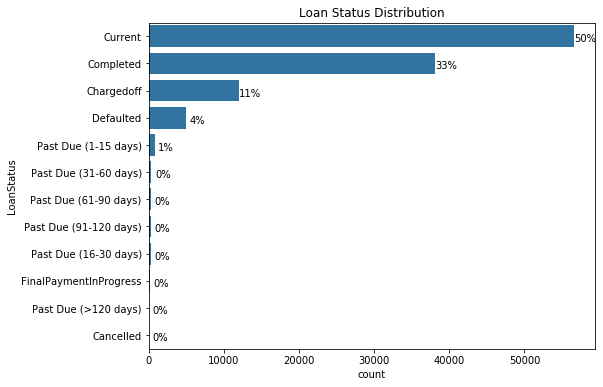

In [157]:
# Loan Status Distribution
status_order = loan['LoanStatus'].value_counts().index

plt.figure(figsize = [8, 6])

sns.countplot(data = loan,y = 'LoanStatus',color = base_color,order=status_order);
plt.title('Loan Status Distribution')

# add annotations
n_points = loan.shape[0]

cat_counts = loan['LoanStatus'].value_counts()

locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');


>from the chart above, we can know that about 5% loans over total are defaulted or past due.

### Income Range

In [159]:
loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [160]:
order = loan['IncomeRange'].value_counts().index

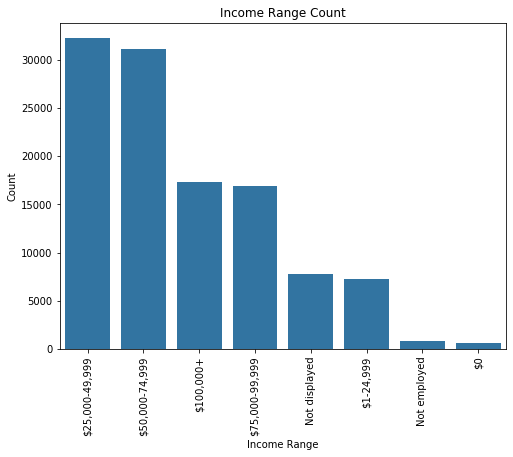

In [161]:
plt.figure(figsize = [8,6])

sns.countplot(data = loan, x = 'IncomeRange', color = base_color, order  = order)

plt.xticks(rotation = 90);

plt.xlabel('Income Range')

plt.ylabel('Count')

plt.title('Income Range Count');

>Most people have income more from 25,000 to 75,000

### Original Loan Amount

next, i will investigate how much money are borrowed

In [162]:
ticks =np.arange(0, 36000 ,2000)

labels = ['{}'.format(v) for v in ticks]

Text(0.5, 1.0, 'Loan Original Amount Count')

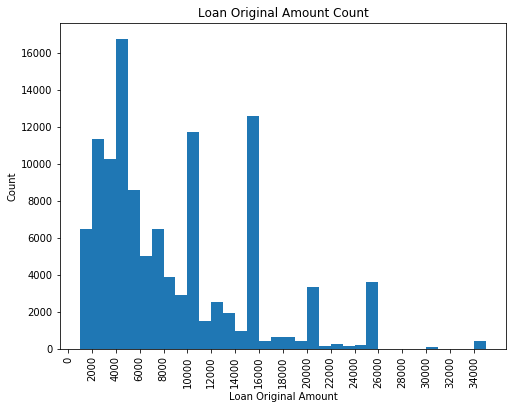

In [163]:
bins = np.arange(loan['LoanOriginalAmount'].min(), loan['LoanOriginalAmount'].max()+1000, 1000)

plt.figure(figsize = [8,6])

plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);

plt.xticks(ticks, labels);

plt.xticks(rotation = 90);

plt.xlabel('Loan Original Amount')

plt.ylabel('Count')

plt.title('Loan Original Amount Count')

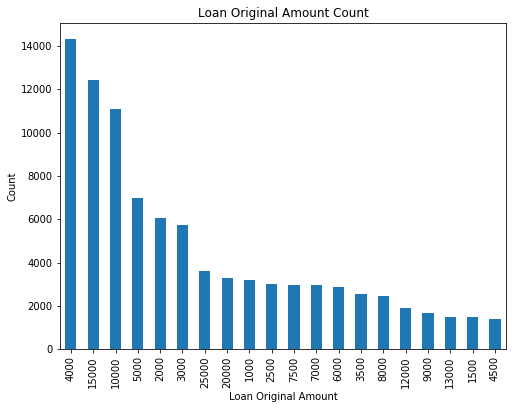

In [164]:
# order from highest  count to lowest count

plt.figure(figsize = [8,6])

loan['LoanOriginalAmount'].value_counts().head(20).plot(kind = 'bar', color = base_color);

plt.xlabel('Loan Original Amount')

plt.ylabel('Count')

plt.title('Loan Original Amount Count');

>don't have too much intuition by analyzing loan original amount seperately.

### Stated Monthly Income

In [166]:
print(loan.StatedMonthlyIncome.min())
print(loan.StatedMonthlyIncome.max())
print(loan.StatedMonthlyIncome.mean())

0.0
1750002.916667
5608.025568224836


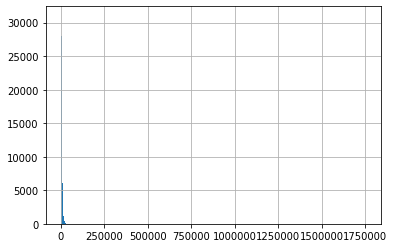

In [167]:
loan.StatedMonthlyIncome.hist(bins = 1000)

since the range of stated monthly income is so large, i decide to use log.

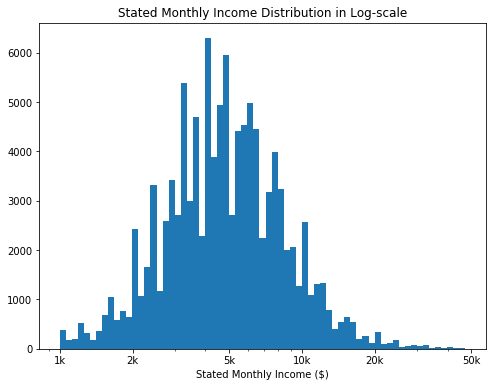

In [168]:
log_binsize = 0.025

bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[8, 6])

plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins)

plt.xscale('log')

plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])

plt.xlabel('Stated Monthly Income ($)')

plt.title('Stated Monthly Income Distribution in Log-scale')

plt.show()

>the distribution of monthly income looks normal distributed and peak at around 5k.

### Prosper Score

next, i will investigate the distribution of prosper score.

In [169]:
loan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

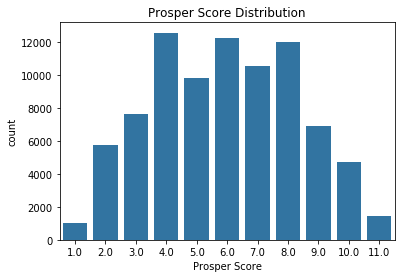

In [170]:
base_color = sns.color_palette()[0]

sns.countplot(data = loan,x= 'ProsperScore',color = base_color)

plt.title('Prosper Score Distribution')

plt.xlabel('Prosper Score');

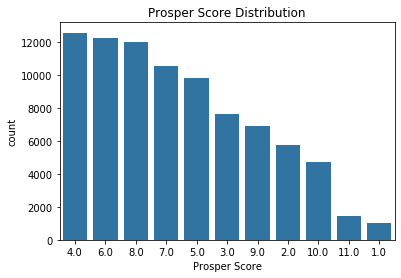

In [171]:
order_prosper_score = loan.ProsperScore.value_counts().index

base_color = sns.color_palette()[0]

sns.countplot(data = loan,x= 'ProsperScore',color = base_color,order =order_prosper_score)

plt.title('Prosper Score Distribution')

plt.xlabel('Prosper Score');

Prosper score of 4, 6 and 8 are most frequent.

### Term

In [172]:
loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

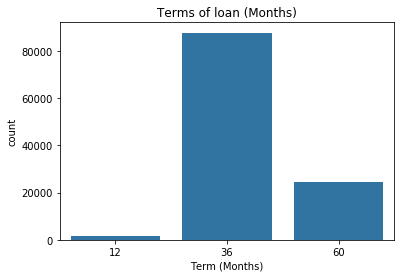

In [173]:
# distribution
base_color = sns.color_palette()[0]

sns.countplot(data = loan,x = 'Term',color = base_color);

plt.title('Terms of loan (Months)')

plt.xlabel('Term (Months)');


>it is obvious that the life span of loans is usually 3 to 5 years.

### Lender Yield

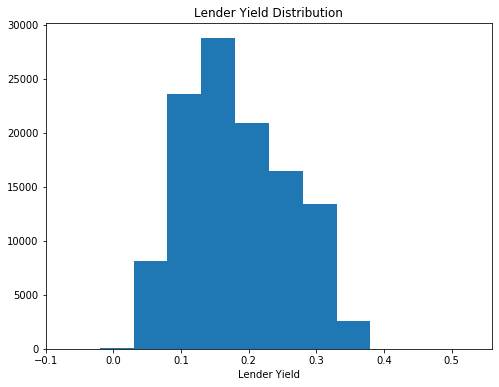

In [174]:
#Lender Yield Distribution
binsize = 0.05

bins = np.arange(-.07, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])

plt.hist(data = loan, x = 'LenderYield', bins = bins)

plt.xlabel('Lender Yield')

plt.title('Lender Yield Distribution')

plt.show()

>the distribution and lender yield looks a little right skewed.

### Borrow State

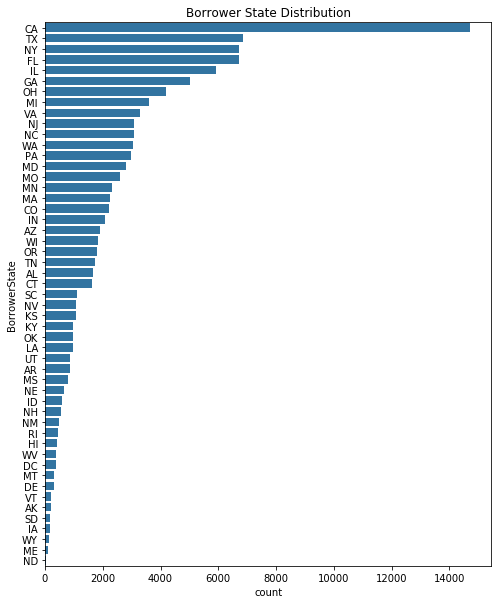

In [175]:
#Borrower State Distrobution
state_order = loan.BorrowerState.value_counts().index

plt.figure(figsize = [8, 10])

sns.countplot(data = loan,y = 'BorrowerState',color = base_color, order = state_order);

plt.title('Borrower State Distribution');

>States California, Texas and New York have the 3 biggest numbers of loans originated in that period of time

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The distribution of borrowers APR looks multimodal. interestingly, there is a strong concentration at around 0.35. There are no unusual points and no need to perform any transformations. california, texas and new york are the states with biggest numbers of loans. besides, most loans have a life span either 3 years or 5 years.

>It was also noticed there are some outliers in the StatedMonthlyIncome that are too far away from most of the values, in some charts these outliers are igonred by limiting the axis values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>when i was doing the investigation, i found that some features had long-tailed and skewed distributions such as Stated Monthly income, it had been checked on a log-scale which revealed the hidden distribution in some areas. 

>Also, i found bar plot is very useful for me to make a clear rank from high to low and figure out what are the most frequent category for each variables.


## Bivariate Exploration

### Correlations

In [176]:
numeric_vars =['Term', 'BorrowerAPR', 'ProsperScore','StatedMonthlyIncome', 'LoanOriginalAmount','LenderYield']
categoric_vars = ['LoanStatus','Occupation', 'EmploymentStatus','IncomeRange','BorrowerState','LoanStatus']


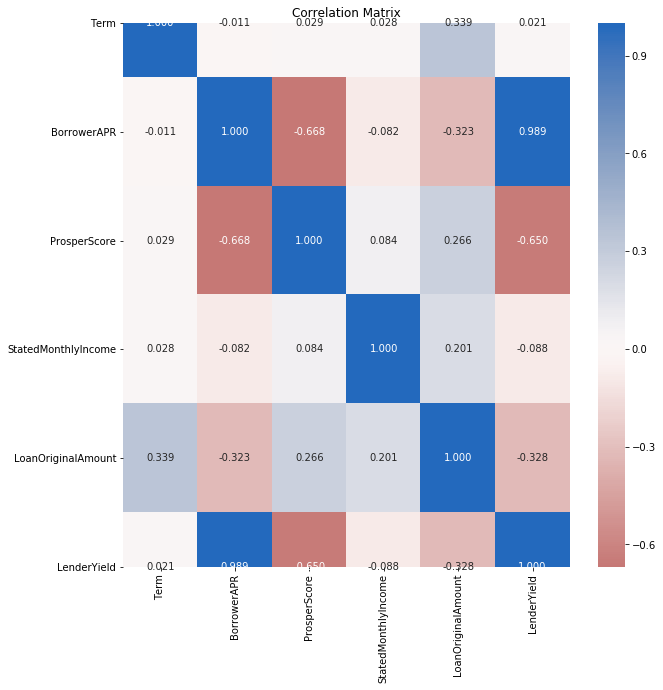

In [177]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [10, 10])

sns.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation Matrix') 

plt.margins(x = 0.5, y= 0.3)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


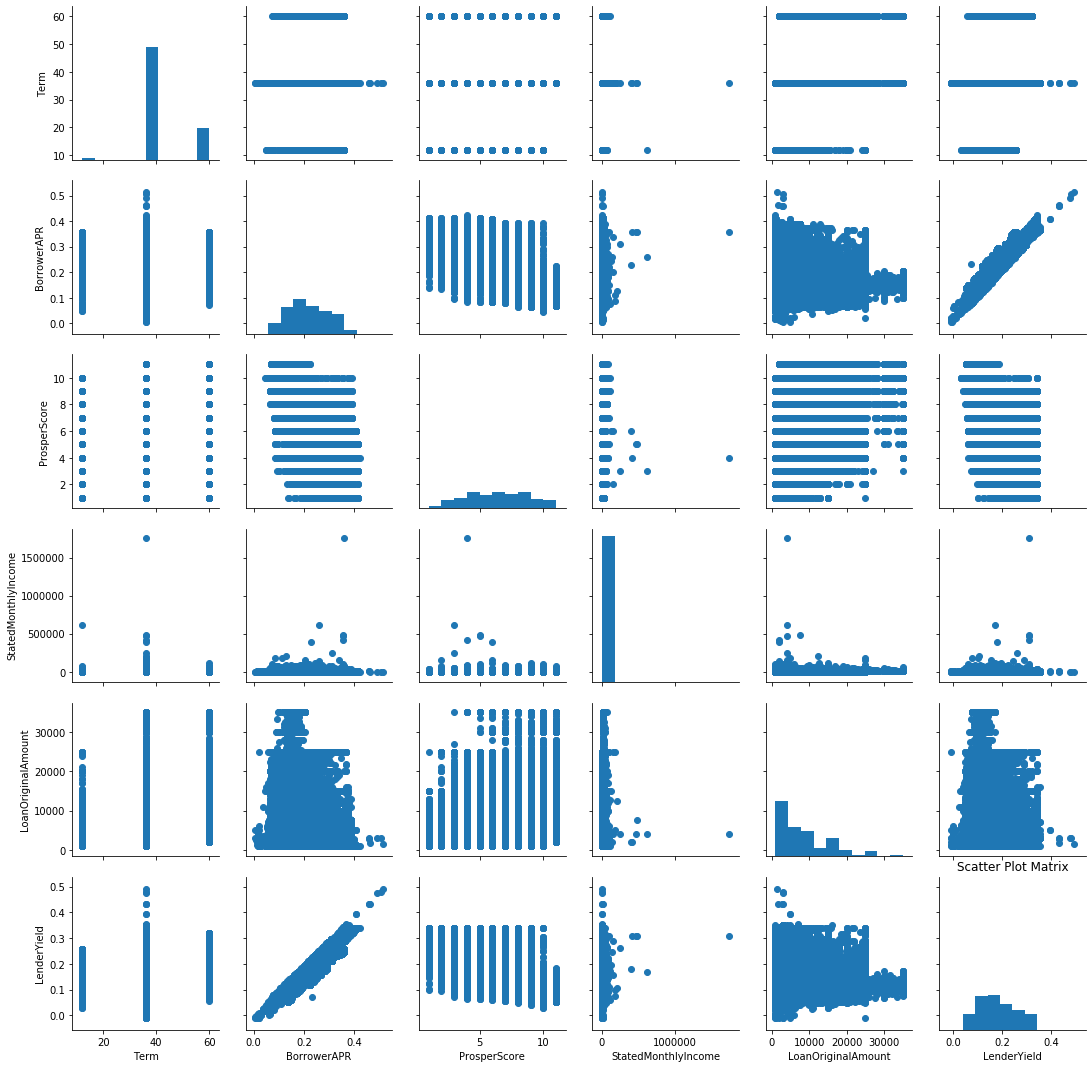

In [178]:
# Building a grid of scatter plots

g = sns.PairGrid(data = loan, vars = numeric_vars)

g.map_offdiag(plt.scatter)

g = g.map_diag(plt.hist, bins = 10)

plt.title('Scatter Plot Matrix');

Based on the correlation matrix and the scatter plots above, there are some findings:

* LenderYield and BorrowerAPR 0.989: Strong positive relationship and this makes sense, the higher the rate the higher the lender earns
* ProsperScore and BorrowerAPR -0.668: Negative relationship, lower score means higher risks and hence higher interest rates.
* LenderYield and ProsperScore -0.650: negative relationship, this is also logic, the higher the score, lower interest rate and hence lower lender yield.
* LoanOriginalAmount and BorrowerAPR -0.323: negative relationship, we may expect that the bigger the loan amount the less the interest rate.

Next, we will explore some of these relationships.

### Prosper Score vs Borrower APR

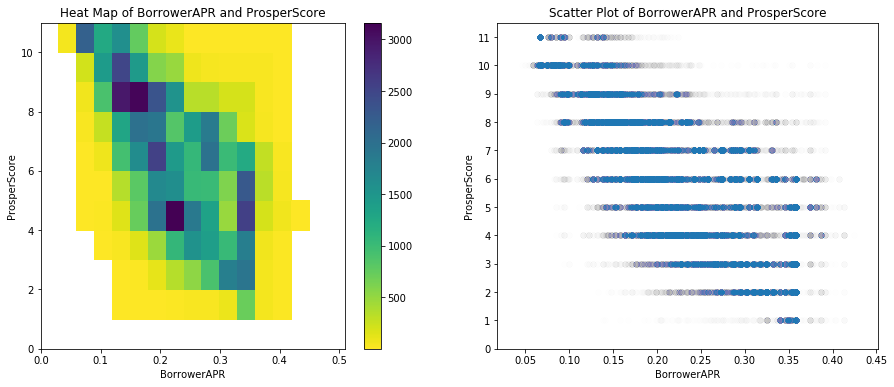

In [179]:
# Checking the relation between ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 6]) 

plt.subplot(1, 2, 1)

bins_x = np.arange(0, loan['BorrowerAPR'].max()+0.02, 0.03)

bins_y = np.arange(0, loan['ProsperScore'].max()+1, 1)

plt.hist2d(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()

plt.title('Heat Map of BorrowerAPR and ProsperScore')

plt.xlabel('BorrowerAPR')

plt.ylabel('ProsperScore');


plt.subplot(1, 2, 2)

plt.scatter(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)

plt.yticks(np.arange(0, 12, 1))

plt.title('Scatter Plot of BorrowerAPR and ProsperScore')

plt.xlabel('BorrowerAPR')

plt.ylabel('ProsperScore');

this shows a negative relationship, a higher prosper score leads to lower borrwoer APR. in reality, it makes sense.

### ProsperScore vs StatedMonthlyIncome

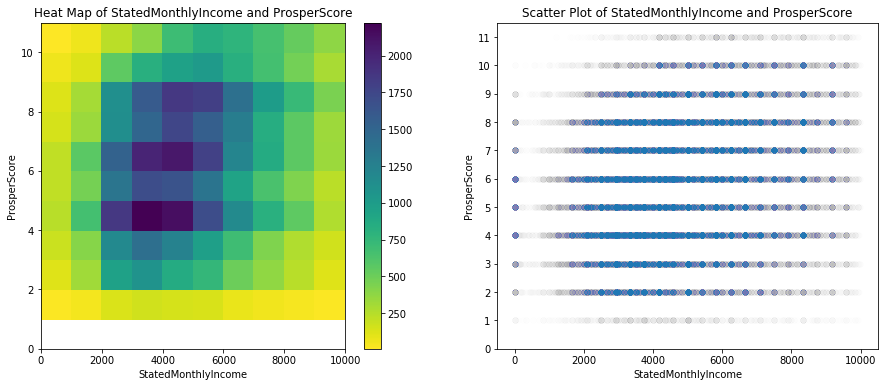

In [180]:
# Checking the relation between ProsperScore and StatedMonthlyIncome

outlier = loan[loan['StatedMonthlyIncome'] < 10000]

plt.figure(figsize = [15, 6]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, outlier['StatedMonthlyIncome'].max()+1000, 1000)
bins_y = np.arange(0, outlier['ProsperScore'].max()+1, 1)
plt.hist2d(data = outlier, x = 'StatedMonthlyIncome', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of StatedMonthlyIncome and ProsperScore')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = outlier, x = 'StatedMonthlyIncome', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of StatedMonthlyIncome and ProsperScore')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

>on the other hand, Prosper Score is positively related to the stated monthly income, also make sense.

### Lender Yield vs Borrower APR

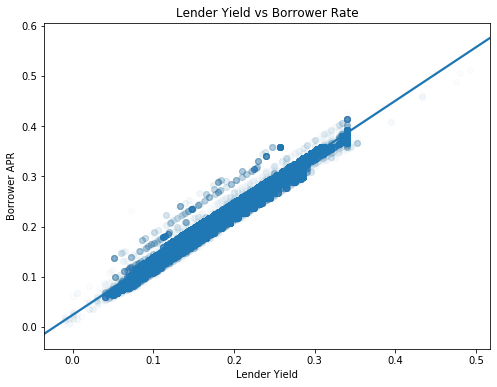

In [181]:
plt.figure(figsize=(8,6))

sns.regplot(data = loan, x = 'LenderYield', y = 'BorrowerAPR', 
            x_jitter= 0.0001, scatter_kws={'alpha':1/50});


plt.xlabel('Lender Yield')

plt.ylabel('Borrower APR')

plt.title('Lender Yield vs Borrower Rate');

>very strong positive correlation between Lender Yield and Borrower APR. make sense.

### LenderYield VS ProsperScore

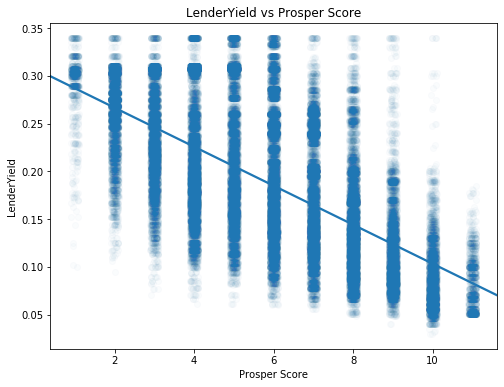

In [182]:
plt.figure(figsize=(8,6))

sns.regplot(data = loan, x = 'ProsperScore', y = 'LenderYield', 
            x_jitter= 0.1, scatter_kws={'alpha':1/50});


plt.xlabel('Prosper Score')

plt.ylabel('LenderYield')

plt.title('LenderYield vs Prosper Score');

>it is also consistent with our finding before, the higher Prosper Score leads to lower Lender Yield.

### LoanOriginalAmount and BorrowerAPR

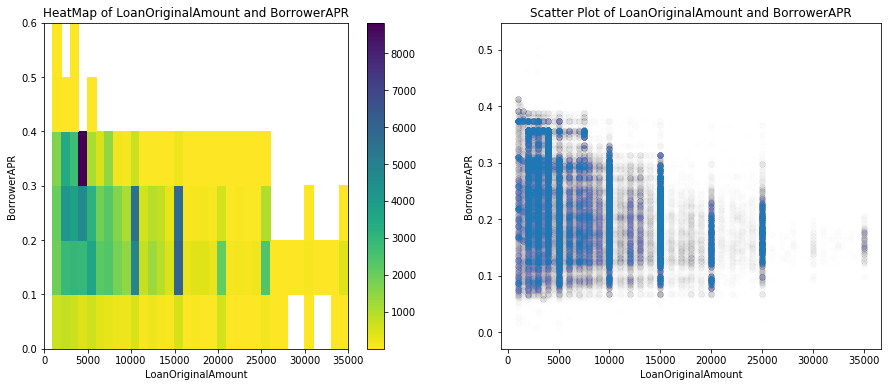

In [183]:
plt.figure(figsize = [15, 6]) 


plt.subplot(1, 2, 1)

bins_x = np.arange(0, loan['LoanOriginalAmount'].max()+1000, 1000)

bins_y = np.arange(0, loan['BorrowerAPR'].max()+0.1, 0.1)

plt.hist2d(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.xlabel('LoanOriginalAmount')

plt.ylabel('BorrowerAPR')

plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')

plt.colorbar()


plt.subplot(1, 2, 2)

plt.scatter(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.005)

plt.yticks(np.arange(0, 0.6, 0.1))

plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')

plt.xlabel('LoanOriginalAmount')

plt.ylabel('BorrowerAPR');


>the larger loan amounts lead to lower borrwoer APR.

### Employment Status vs Borrower APR

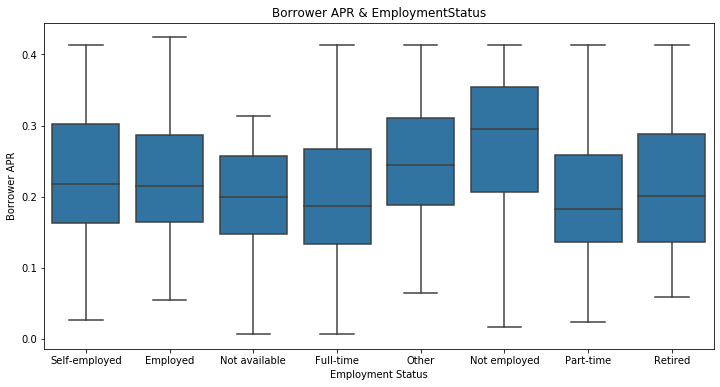

In [184]:
plt.figure(figsize = [12, 6])

sns.boxplot(data = loan,y = 'BorrowerAPR',x = 'EmploymentStatus',color=base_color);

plt.ylabel('Borrower APR');

plt.xlabel('Employment Status');

plt.title('Borrower APR & EmploymentStatus');

> people with job tend to get a lower APR. on the contrary, people withou job, on average, have the highest APR.

### Employment Status vs Original Loan Amount

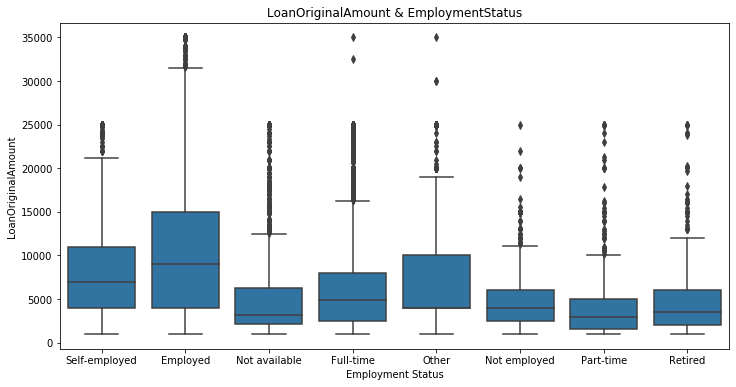

In [185]:
plt.figure(figsize = [12, 6])

sns.boxplot(data = loan,y = 'LoanOriginalAmount',x = 'EmploymentStatus',color = base_color);

plt.ylabel('LoanOriginalAmount');

plt.xlabel('Employment Status');

plt.title('LoanOriginalAmount & EmploymentStatus');

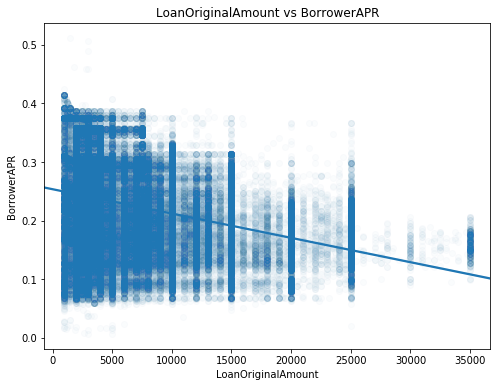

In [186]:
plt.figure(figsize=(8,6))

sns.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
            x_jitter= 0.1, scatter_kws={'alpha':1/50});


plt.xlabel('LoanOriginalAmount')

plt.ylabel('BorrowerAPR')

plt.title('LoanOriginalAmount vs BorrowerAPR');

>on average, employed people got larger original amount than unemployed, part-time and retired people

### Prosper Score vs. Borrower APR 

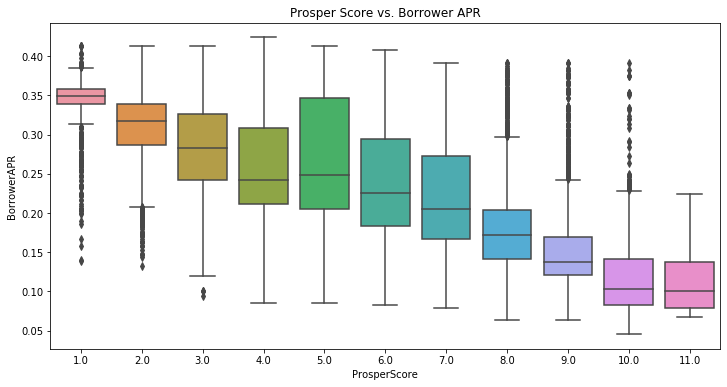

In [187]:
plt.figure(figsize = [12, 6])

sns.boxplot(data = loan,x = 'ProsperScore',y = 'BorrowerAPR');

plt.xlabel('ProsperScore');

plt.ylabel('BorrowerAPR');

plt.title('Prosper Score vs. Borrower APR');

> Borrower APR is negatively related to Prosper score, a higher score leads to a lower borrower APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The borrower APR is negatively correlated with the loan original amount, which tells us the larger the loan amount is, the lower the Borrower APR is.

* the Borrower APR is strongly and positively correlated to lender yield. a higher ledner yield leads to the higher  borrower APR.

* Also, the prosper score affects the lender yield. the higher prosper score leads to a lower lender yield.

* last but not least, prosper score is negetively correlated to borrower APR. the higher score borrowers have, the lower Borrower APR.

* on average, employed people got larger original amount than unemployed, part-time and retired people.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> i observed that EmploymentStatus has a relation with LoanOriginal Amount where the un-employed are mostly get the least amount.

> also, the employment status will afect the borrower apr, people with job tend to get e lower apr than un-employed people.

> in addition, Borrower APR is negatively correlated to Prosper Score. higher score leads to lower APR.

## Multivariate Exploration

### BorrowerAPR vs CreditScoreRangeUpper & CreditScoreRangeUpper

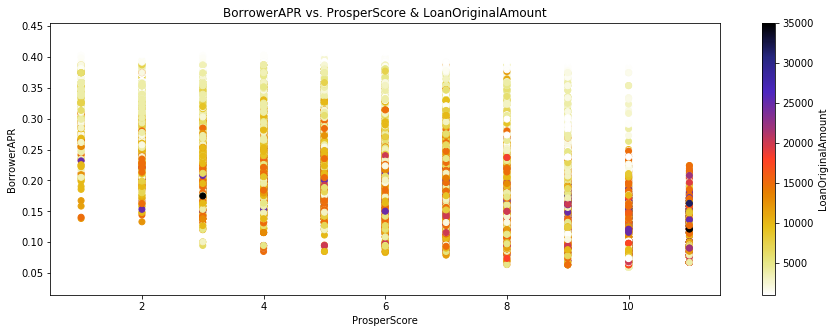

In [188]:
# BorrowerAPR vs CreditScoreRangeUpper & CreditScoreRangeUpper

plt.figure(figsize = [15, 5]) 

cm = plt.cm.get_cmap('CMRmap_r')

plt.scatter(data = loan[loan['StatedMonthlyIncome'] <20000],\
            x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 

plt.colorbar(label = 'LoanOriginalAmount')

plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')

plt.xlabel('ProsperScore')

plt.ylabel('BorrowerAPR');

>in addition to negative correlation between prosper score and borrower apr, the chart shows most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

### LenderYield and Borrower APR  vs ProsperRating

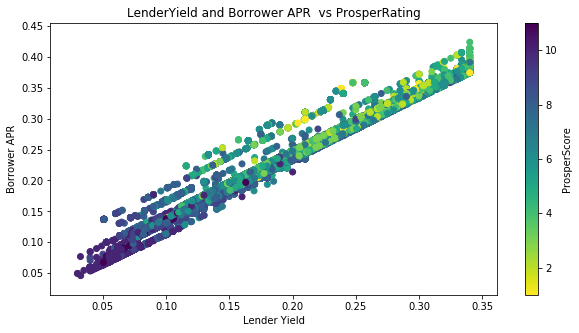

In [189]:
# LenderYield and Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])

plt.scatter(data = loan,x = 'LenderYield',y = 'BorrowerAPR',c = 'ProsperScore',cmap = 'viridis_r')

plt.colorbar(label = 'ProsperScore');

plt.xlabel('Lender Yield')

plt.ylabel('Borrower APR')

plt.title('LenderYield and Borrower APR  vs ProsperRating');

* this chart confirm the strongly positive correlation between lender yield and borrower APR.

* also, people with higher prosper score will tend to get a lower lender yield and borrower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relation between EmploymentStatus, ProsperScore and BorrowerAPR

>* Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
>* Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
>* Retired people have higher ProsperScore and lower BorrowerAPR

### Were there any interesting or surprising interactions between features?

>It was important and unsurprising to notice the fact that loans with higher LoanOriginalAmount are mostly taken by people with higher Prosper Score.